# Week 7 - Milestone One week

# 1. Lesson: no lesson this week.  Milestone One is due!

# 2. Weekly graph question

Below are the graphs from last week's weekly graph question.  Suppose you wanted to cause the viewer to examine the last three months of data first.  How could you use preattentive attributes to do that?  Suggest several possibilities.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

/tmp/ipykernel_1659/2149468501.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

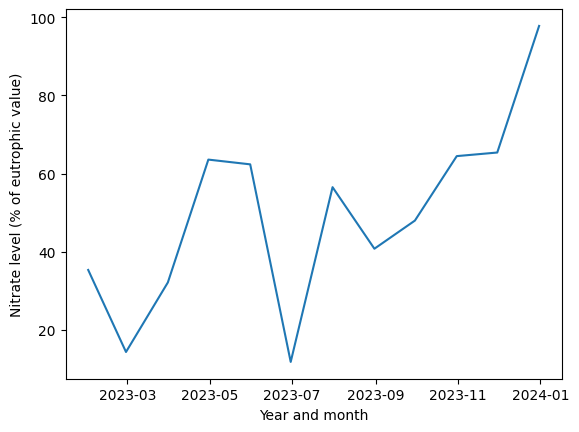

In [2]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

/tmp/ipykernel_1659/1012779568.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

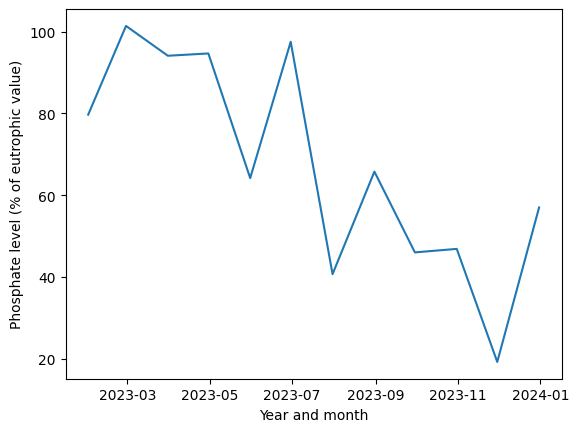

In [3]:
np.random.seed(1)
time_series = 100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

# 3. Working on your datasets

This week, you can work on Milestone One rather than having a particular exercise about working on your datasets

## Summarizing Data and Handling Inconsistent Data

### Dataset1: MEPS HC-244: MEPS Panel 26 Two-Year Longitudinal Data File (NEW)

In [2]:
import math
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [10]:
!pip install pandas openpyxl


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [3]:
ds1_meps = pd.read_excel("/workspaces/2025-spring-B2/DS1 - h244.xlsx")
#ds1_meps.info()

In [4]:
ds1_meps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6741 entries, 0 to 6740
Columns: 2737 entries, DUID to LSAQWT
dtypes: float64(24), int64(2693), object(20)
memory usage: 140.8+ MB


In [5]:
ds1_meps.head(10)

,DUID,PID,DUPERSID,PANEL,YEARIND,SAQRDS24,DATAYEARY2,ALL5RDS,DIED,INST,...,RXOSRY1,RXOSRY2,RXPTRY1,RXPTRY2,RXOTHY1,RXOTHY2,VARPSU,VARSTR,LONGWT,LSAQWT
0,2680001,101,2680001101,26,1,0,2022,1,0,0,...,0,0,0,0,0,0,1,2014,31510.685960,0.000000
1,2680001,102,2680001102,26,1,0,2022,1,0,0,...,0,0,65,0,0,0,1,2014,41870.992600,0.000000
2,2680006,101,2680006101,26,1,1,2022,1,0,0,...,0,0,6,13,0,0,2,2018,29437.873605,39369.470269
3,2680010,101,2680010101,26,1,1,2022,1,0,0,...,0,0,0,0,0,0,2,2002,21586.817670,24272.428247
4,2680015,101,2680015101,26,1,0,2022,1,0,0,...,0,0,598,2000,0,0,2,2074,42793.201436,0.000000
5,2680018,101,2680018101,26,1,1,2022,1,0,0,...,0,0,0,0,0,0,2,2064,65829.092152,76756.481682
6,2680018,102,2680018102,26,1,0,2022,0,1,0,...,0,0,0,0,0,0,2,2064,81768.470371,0.000000
7,2680020,101,2680020101,26,1,0,2022,1,0,0,...,0,0,13,23,0,0,1,2013,29619.174868,0.000000
8,2680020,102,2680020102,26,1,0,2022,1,0,0,...,0,0,0,32,0,0,1,2013,16246.033012,0.000000
9,2680022,101,2680022101,26,1,1,2022,1,0,0,...,0,0,0,0,0,0,1,2075,70804.859744,118896.326742


In [6]:
ds1_meps.describe()

,DUID,PID,DUPERSID,PANEL,YEARIND,SAQRDS24,DATAYEARY2,ALL5RDS,DIED,INST,...,RXOSRY1,RXOSRY2,RXPTRY1,RXPTRY2,RXOTHY1,RXOTHY2,VARPSU,VARSTR,LONGWT,LSAQWT
count,6.741000e+03,6741.000000,6.741000e+03,6741.0,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,...,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000
mean,2.684728e+06,102.202641,2.684728e+09,26.0,1.031894,0.475597,1989.288681,0.933838,0.022994,0.003115,...,0.005785,-0.008901,621.863967,681.911141,28.282451,28.422341,2.366118,2055.126984,49996.038645,38241.105807
std,2.747554e+03,4.733321,2.747554e+06,0.0,0.215891,0.499441,255.175679,0.248584,0.149894,0.055732,...,1.053803,0.462137,9181.818331,9068.790446,1214.393300,609.037490,1.343543,33.910594,40390.008691,59407.014502
min,2.680001e+06,101.000000,2.680001e+09,26.0,1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,2001.000000,2300.450793,0.000000
25%,2.682340e+06,101.000000,2.682340e+09,26.0,1.000000,0.000000,2022.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2025.000000,23336.049273,0.000000
50%,2.684729e+06,102.000000,2.684729e+09,26.0,1.000000,0.000000,2022.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2052.000000,38822.860849,14895.686119
75%,2.687099e+06,103.000000,2.687099e+09,26.0,1.000000,1.000000,2022.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000,2084.000000,64372.684108,54873.558433
max,2.689506e+06,302.000000,2.689506e+09,26.0,3.000000,1.000000,2022.000000,1.000000,1.000000,1.000000,...,86.000000,35.000000,629851.000000,648313.000000,95476.000000,37826.000000,8.000000,2117.000000,367953.505563,540104.304709


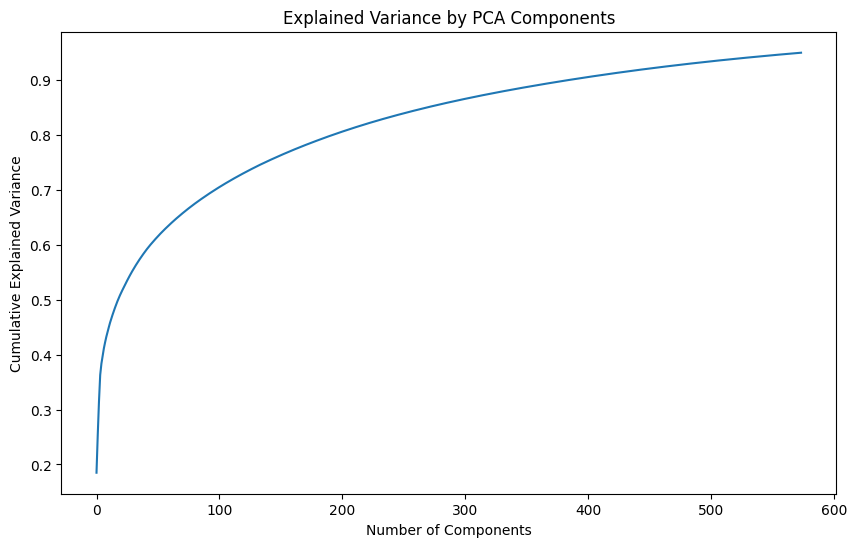

Top features in Component 0:
PNEJAY2: 0.0407
PNEFEY2: 0.0407
HPOFEY2: 0.0404
INSCOP3: -0.0404
HPOJAY2: 0.0404
GVBFEY2: 0.0404
PNEDEY1: 0.0404
GVCFEY2: 0.0403
GVBJAY2: 0.0403
PNEMAY2: 0.0403


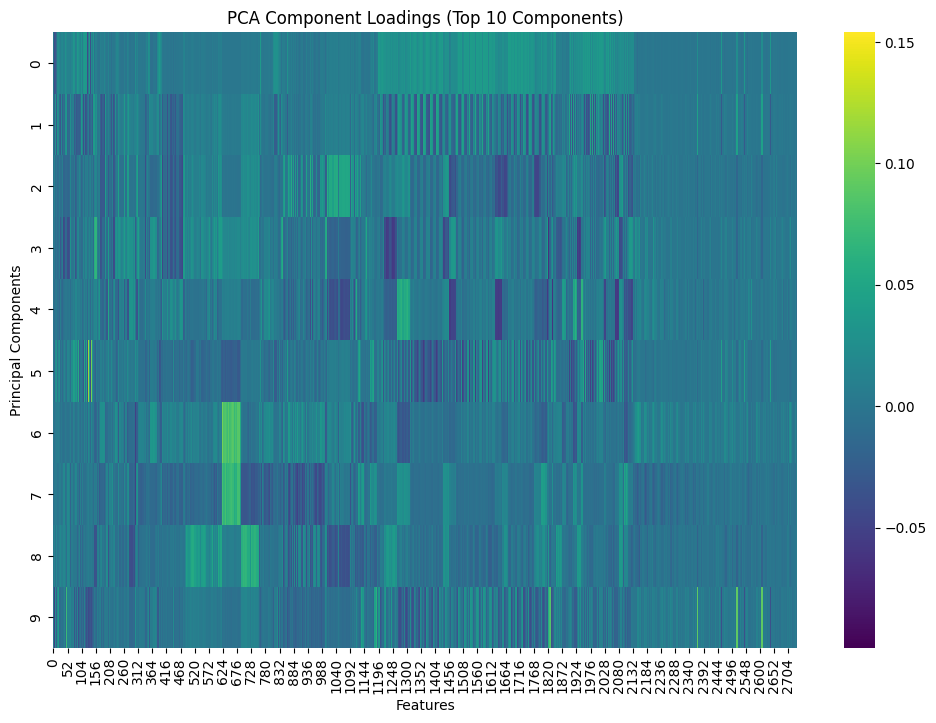

In [7]:
# Option A: Principle Component Analysis to find the Top 10 Features 

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


# Step 1: Preprocessing
# Handle missing values (if any)
# Example: Fill numerical missing values with mean/median
df1= ds1_meps.fillna(ds1_meps.median(numeric_only=True))

# Encode categorical variables (if any object columns exist)
# Example: Label encode categorical columns (if applicable)
from sklearn.preprocessing import LabelEncoder
for col in df1.select_dtypes(include=['object']).columns:
    df1[col] = LabelEncoder().fit_transform(df1[col])

# Step 2: Standardize the data (critical for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1)

# Step 3: Perform PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
pca_result = pca.fit_transform(scaled_data)

# Step 4: Analyze results
# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.show()

# Identify top components
n_top_components = 10  # Adjust based on variance plot
top_components = pca.components_[:n_top_components]

# Function to extract top features for a component
def get_top_features(component, feature_names, n=10):
    loadings = list(zip(feature_names, component))
    loadings.sort(key=lambda x: abs(x[1]), reverse=True)
    return loadings[:n]

# Example: Analyze the first component
top_features_component_0 = get_top_features(pca.components_[0], df1.columns)
print("Top features in Component 0:")
for feature, loading in top_features_component_0:
    print(f"{feature}: {loading:.4f}")

# Optional: Heatmap of component loadings
plt.figure(figsize=(12, 8))
sns.heatmap(pca.components_[:10], cmap='viridis', annot=False)
plt.xlabel('Features')
plt.ylabel('Principal Components')
plt.title('PCA Component Loadings (Top 10 Components)')
plt.show()

### These columns could be considered as Target for this Dataset1;
'TOTEXPY1', 'TOTEXPY2','TOTTCHY1', 'TOTTCHY2', 'ERTOTY1', 'ERTOTY2', 'ERTEXPY1', 'ERTEXPY2', 'IPFEXPY1', 'IPFEXPY2', 'RXEXPY1', 'RXEXPY2'

And there could be more. I am going to consider one Target, which is "TOTEXPY1"

In [8]:
selected_features = [
    'PNEJAY2', 'PNEFEY2', 'HPOFEY2', 'INSCOP3', 'HPOJAY2', 'GVBFEY2', 'PNEDEY1',
    'GVCFEY2', 'GVBJAY2', 'PNEMAY2', 'TOTEXPY1'
]

# Step 1: Select the relevant columns from the original DataFrame
des1_meps_top_20a = df1[selected_features]

# Step 2: Display the first few rows of the new DataFrame
des1_meps_top_20a.head(10)

,PNEJAY2,PNEFEY2,HPOFEY2,INSCOP3,HPOJAY2,GVBFEY2,PNEDEY1,GVCFEY2,GVBJAY2,PNEMAY2,TOTEXPY1
0,2,2,2,1,2,2,2,2,2,2,0
1,2,2,2,1,2,2,2,2,2,2,797
2,2,2,2,1,2,2,2,2,2,2,4656
3,2,2,2,1,2,2,2,2,2,2,11127
4,2,2,2,1,2,2,2,2,2,2,3432
5,2,2,2,1,2,2,2,2,2,2,1612
6,2,2,2,1,2,2,2,2,2,2,5223
7,2,2,2,1,2,2,2,2,2,2,439
8,2,2,2,1,2,2,2,2,2,2,2415
9,2,2,2,1,2,2,2,2,2,2,958


In [9]:
des1_meps_top_20a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6741 entries, 0 to 6740
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   PNEJAY2   6741 non-null   int64
 1   PNEFEY2   6741 non-null   int64
 2   HPOFEY2   6741 non-null   int64
 3   INSCOP3   6741 non-null   int64
 4   HPOJAY2   6741 non-null   int64
 5   GVBFEY2   6741 non-null   int64
 6   PNEDEY1   6741 non-null   int64
 7   GVCFEY2   6741 non-null   int64
 8   GVBJAY2   6741 non-null   int64
 9   PNEMAY2   6741 non-null   int64
 10  TOTEXPY1  6741 non-null   int64
dtypes: int64(11)
memory usage: 579.4 KB


In [10]:
des1_meps_top_20a.describe()

,PNEJAY2,PNEFEY2,HPOFEY2,INSCOP3,HPOJAY2,GVBFEY2,PNEDEY1,GVCFEY2,GVBJAY2,PNEMAY2,TOTEXPY1
count,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.00000,6741.000000,6741.000000,6.741000e+03
mean,1.928497,1.923008,1.918113,1.103842,1.923750,1.917816,1.931167,1.91752,1.923305,1.921377,8.612276e+03
std,0.455031,0.471603,0.475950,0.704512,0.459455,0.476210,0.446560,0.47647,0.459865,0.476811,3.515008e+04
min,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000e+00
25%,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,4.380000e+02
50%,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,1.973000e+03
75%,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,6.794000e+03
max,2.000000,2.000000,2.000000,9.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.187290e+06


           PNEJAY2   PNEFEY2   HPOFEY2   INSCOP3   HPOJAY2   GVBFEY2  \
PNEJAY2   1.000000  0.938139  0.922476 -0.895994  0.983069  0.921873   
PNEFEY2   0.938139  1.000000  0.983240 -0.866811  0.921940  0.982600   
HPOFEY2   0.922476  0.983240  1.000000 -0.857379  0.938275  0.971852   
INSCOP3  -0.895994 -0.866811 -0.857379  1.000000 -0.885842 -0.856818   
HPOJAY2   0.983069  0.921940  0.938275 -0.885842  1.000000  0.911212   
GVBFEY2   0.921873  0.982600  0.971852 -0.856818  0.911212  1.000000   
PNEDEY1   0.954194  0.893506  0.878176 -0.905382  0.937627  0.877600   
GVCFEY2   0.921272  0.981962  0.971214 -0.856258  0.910611  0.982999   
GVBJAY2   0.982040  0.920960  0.910834 -0.884909  0.970859  0.938010   
PNEMAY2   0.877435  0.940354  0.924840 -0.844914  0.862541  0.924231   
TOTEXPY1 -0.030796 -0.035949 -0.036770  0.007844 -0.031908 -0.035587   

           PNEDEY1   GVCFEY2   GVBJAY2   PNEMAY2  TOTEXPY1  
PNEJAY2   0.954194  0.921272  0.982040  0.877435 -0.030796  
PNEFEY2   0.8

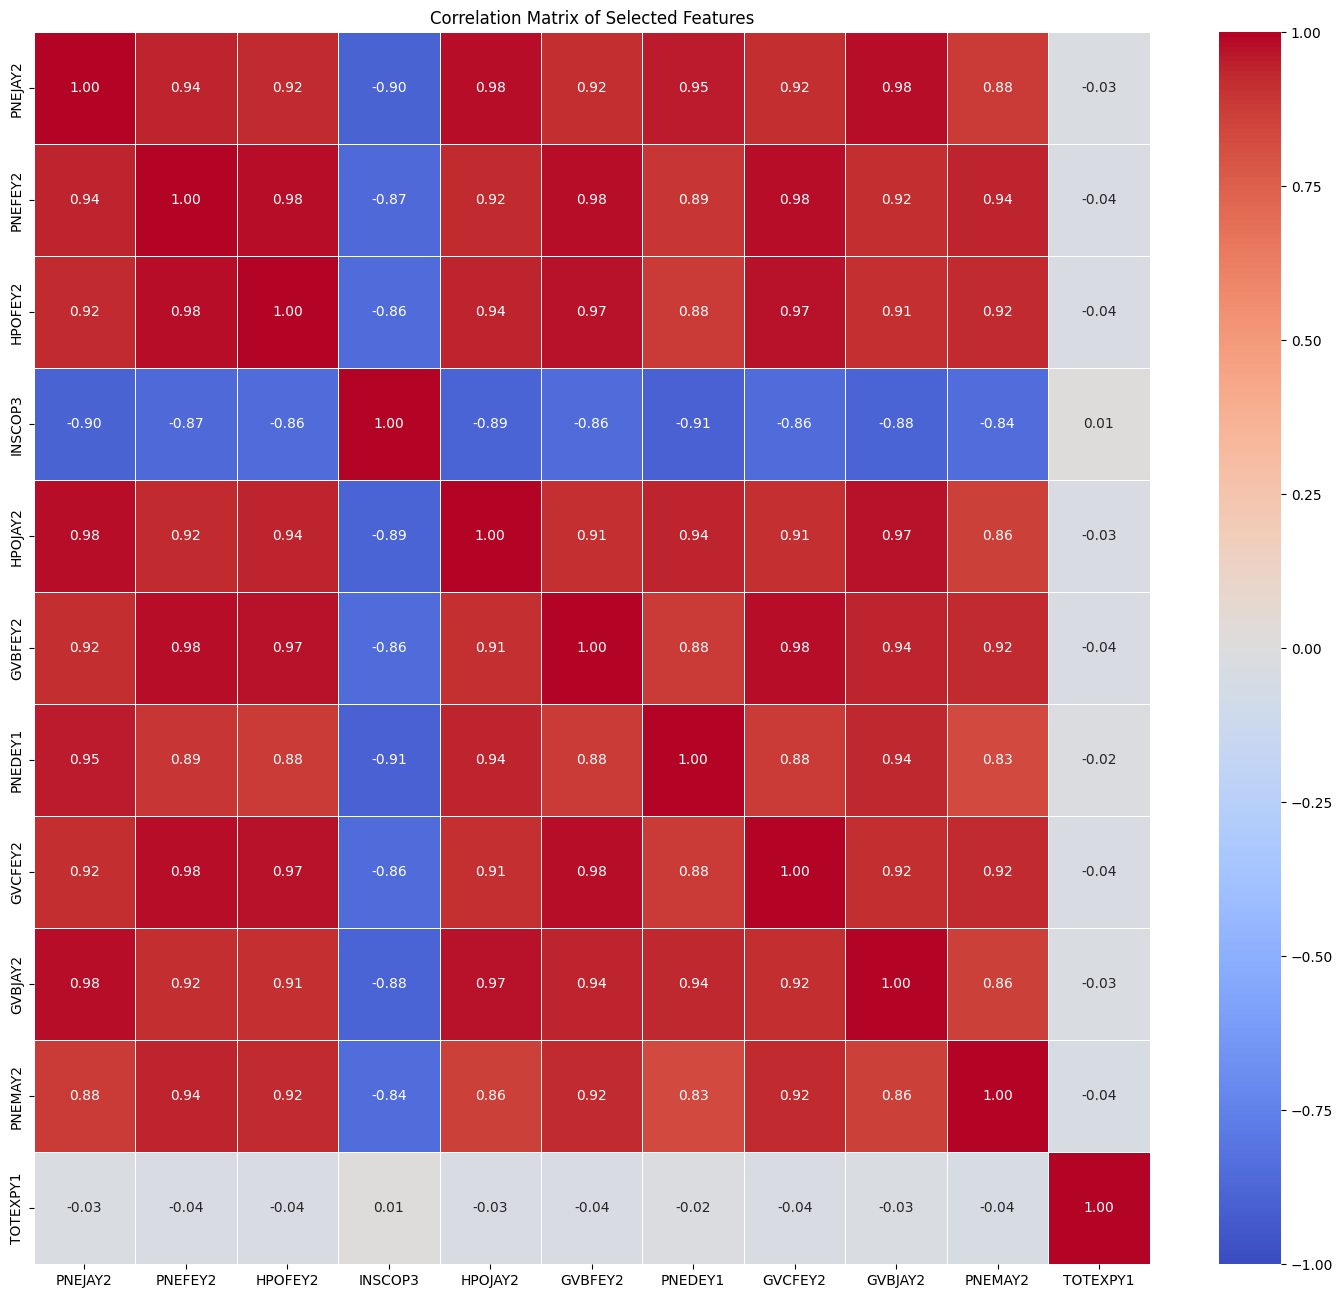

In [ ]:
# Finding the correlation among 10 Features selected

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Compute the correlation matrix of the selected features
correlation_matrix = des1_meps_top_20a.corr()

# Step 2: Display the correlation matrix
print(correlation_matrix)

# Step3: Create a heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# plt.title("Correlation Matrix of Selected Features")
# plt.show()

# Step 2: Create a heatmap of the correlation matrix
plt.figure(figsize=(18, 16))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

# Step 3: Add title and display the heatmap
plt.title("Correlation Matrix of Selected Features")
plt.show()

In [12]:
# Option B: Use the ANOVA F-test to find another set of 10 Features

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables (if any object columns exist)
# Example: Label encode categorical columns (if applicable)
for col in df1.select_dtypes(include=['object']).columns:
    df1[col] = LabelEncoder().fit_transform(df1[col])

# Assume 'TOTEXPY1' is your target variable
X = df1.drop('TOTEXPY1', axis=1)  # Drop the target column for feature selection
y = df1['TOTEXPY1']  # Assume the target column is named 'target'

# Scale the data (make sure to apply scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use SelectKBest with f_classif (ANOVA F-test) for regression problems
selector = SelectKBest(f_classif, k=10)
X_new = selector.fit_transform(X_scaled, y)

# Get the names of the selected features
selected_features = X.columns[selector.get_support()]
print("Top 20 Selected Features:", selected_features)


Top 20 Selected Features: Index(['HHAVAY1', 'HHATRIY1', 'HHAOSRY1', 'HHNVAY1', 'HHNTRIY1', 'HHNOSRY1',
       'HHNOTHY1', 'VISSTLY1', 'OTHSTLY1', 'RXOSRY1'],
      dtype='object')


/home/codespace/.local/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [   3 2314 2342 2344 2372 2374 2378 2482 2486 2490 2494 2510 2514 2518
 2522 2536 2538 2542 2546 2550 2600 2602 2610 2630 2632 2640 2644 2666
 2694 2726] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/codespace/.local/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [13]:
selected_features2 = ['HHAVAY1', 'HHATRIY1', 'HHAOSRY1', 'HHNVAY1', 'HHNTRIY1', 'HHNOSRY1',
       'HHNOTHY1', 'VISSTLY1', 'OTHSTLY1', 'RXOSRY1', 'TOTEXPY1'
]

# Step 1: Select the relevant columns from the original DataFrame
des1_meps_top_20b = df1[selected_features2]

# Step 2: Display the first few rows of the new DataFrame
des1_meps_top_20b.head()

,HHAVAY1,HHATRIY1,HHAOSRY1,HHNVAY1,HHNTRIY1,HHNOSRY1,HHNOTHY1,VISSTLY1,OTHSTLY1,RXOSRY1,TOTEXPY1
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,797
2,0,0,0,0,0,0,0,0,0,0,4656
3,0,0,0,0,0,0,0,0,0,0,11127
4,0,0,0,0,0,0,0,0,0,0,3432


In [14]:
des1_meps_top_20b.describe()

,HHAVAY1,HHATRIY1,HHAOSRY1,HHNVAY1,HHNTRIY1,HHNOSRY1,HHNOTHY1,VISSTLY1,OTHSTLY1,RXOSRY1,TOTEXPY1
count,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6.741000e+03
mean,1.557632,0.069871,1.054740,0.022400,0.039905,0.923750,0.923750,0.058893,0.588192,0.005785,8.612276e+03
std,126.143980,6.382888,70.540016,2.486331,3.922965,76.488882,76.488882,5.481688,37.786553,1.053803,3.515008e+04
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.380000e+02
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.973000e+03
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.794000e+03
max,10355.000000,524.000000,5639.000000,204.000000,322.000000,6280.000000,6280.000000,450.000000,3000.000000,86.000000,2.187290e+06


           HHAVAY1  HHATRIY1  HHAOSRY1   HHNVAY1  HHNTRIY1  HHNOSRY1  \
HHAVAY1   1.000000 -0.000125 -0.000184 -0.000086 -0.000110 -0.000148   
HHATRIY1 -0.000125  1.000000 -0.000146  0.000397  0.999962 -0.000116   
HHAOSRY1 -0.000184 -0.000146  1.000000 -0.000090 -0.000124 -0.000179   
HHNVAY1  -0.000086  0.000397 -0.000090  1.000000  0.000715 -0.000067   
HHNTRIY1 -0.000110  0.999962 -0.000124  0.000715  1.000000 -0.000097   
HHNOSRY1 -0.000148 -0.000116 -0.000179 -0.000067 -0.000097  1.000000   
HHNOTHY1 -0.000148 -0.000116 -0.000179 -0.000067 -0.000097  1.000000   
VISSTLY1 -0.000121  0.000107 -0.000140  0.000480  0.000256 -0.000111   
OTHSTLY1 -0.000191 -0.000138 -0.000230 -0.000057 -0.000105 -0.000185   
RXOSRY1  -0.000009  0.001109  0.002670  0.002952  0.001846  0.000031   
TOTEXPY1  0.004130  0.002486  0.060487  0.000911  0.002675  0.004514   

          HHNOTHY1  VISSTLY1  OTHSTLY1   RXOSRY1  TOTEXPY1  
HHAVAY1  -0.000148 -0.000121 -0.000191 -0.000009  0.004130  
HHATRIY1 -0.0

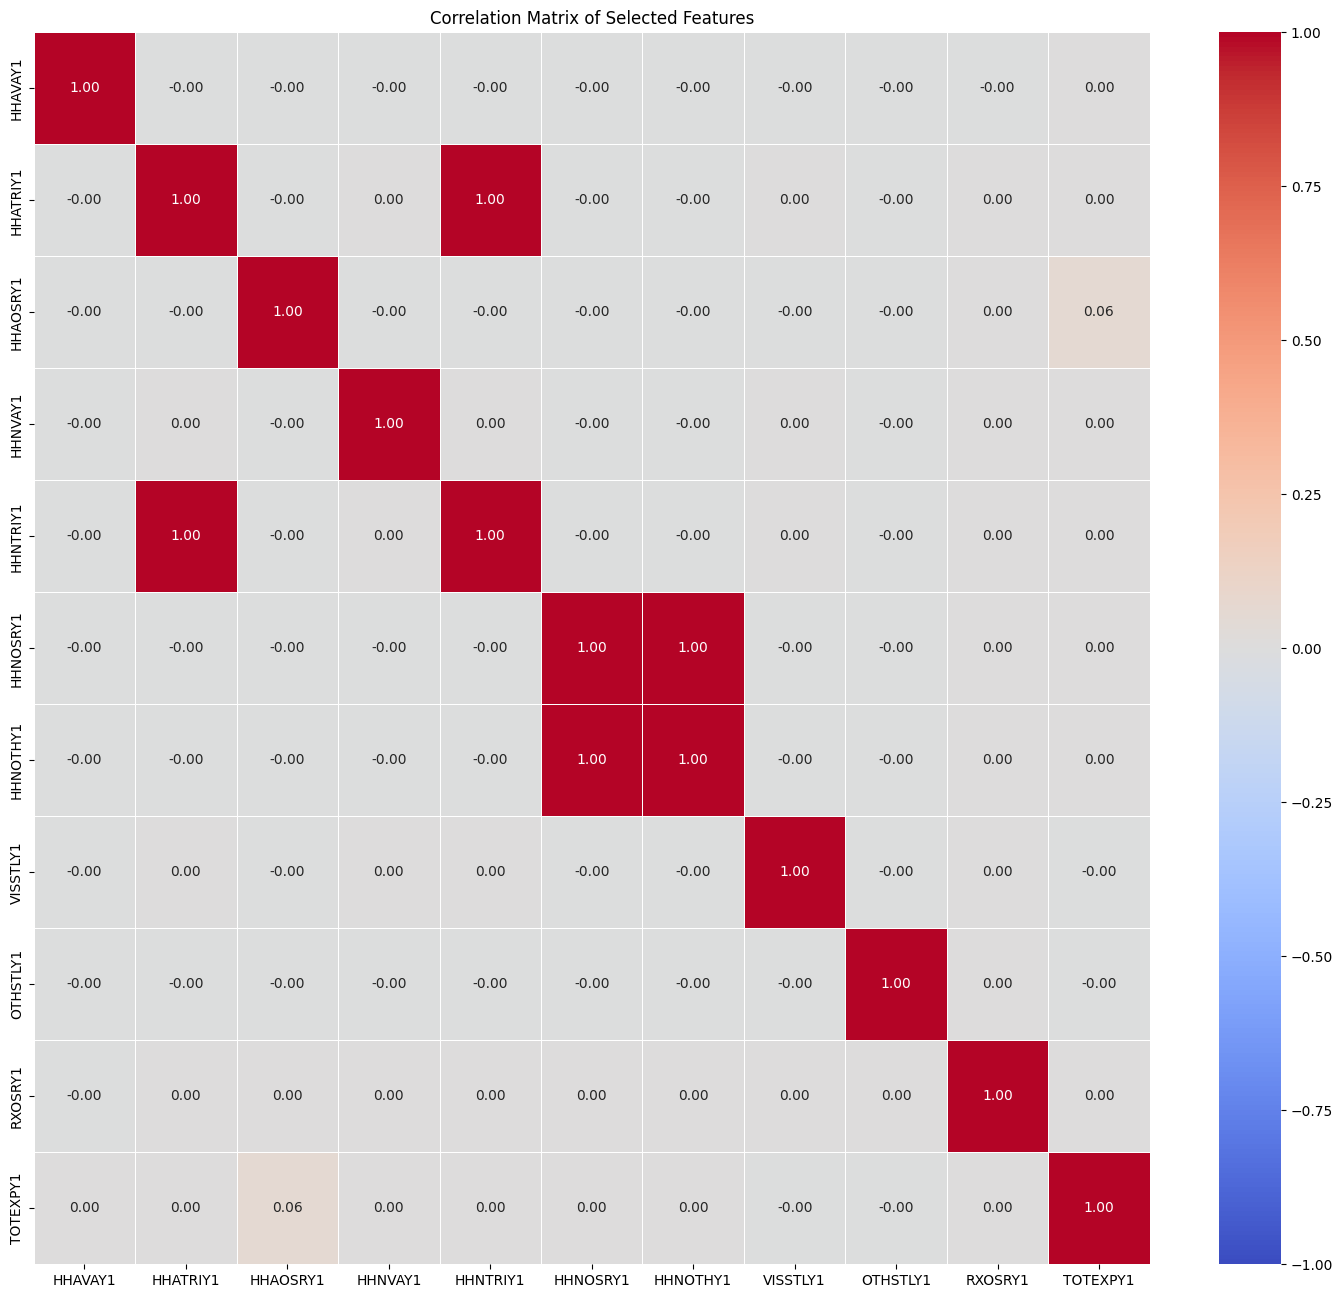

In [15]:
import pandas as pd

# Assume 'df_selected' is the DataFrame containing your selected features

# Step 1: Compute the correlation matrix of the selected features
correlation_matrix = des1_meps_top_20b.corr()

# Step 2: Display the correlation matrix
print(correlation_matrix)

# Optional: If you want to visualize the correlation matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt


# Step 2: Create a heatmap of the correlation matrix
plt.figure(figsize=(18, 16))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

# Step 3: Add title and display the heatmap
plt.title("Correlation Matrix of Selected Features")
plt.show()

### The remaining analysis of Dataset1: MEPS HC-244 will be proceed with OptionA dataset. i.e. des1_meps_top_20a

In [16]:
print("Number of duplicate rows in the data set : ", des1_meps_top_20a.duplicated().sum())

Number of duplicate rows in the data set :  2260


In [17]:
# Are there any duplicate values in a given column (when this would be inappropriate?)
duplicates_all_columns = des1_meps_top_20a.duplicated()
# Display rows that are duplicates across all columns
print(des1_meps_top_20a[duplicates_all_columns])

      PNEJAY2  PNEFEY2  HPOFEY2  INSCOP3  HPOJAY2  GVBFEY2  PNEDEY1  GVCFEY2  \
14          2        2        2        1        2        2        2        2   
20          2        2        2        1        2        2        2        2   
21          2        2        2        1        2        2        2        2   
27          2        2        2        1        2        2        2        2   
47          2        2        2        1        2        2        2        2   
...       ...      ...      ...      ...      ...      ...      ...      ...   
6731        2        2        2        1        2        2        2        2   
6732        2        2        2        1        2        2        2        2   
6734        2        2        2        1        2        2        2        2   
6736        2        2        2        1        2        2        2        2   
6740        2        2        2        1        2        2        2        2   

      GVBJAY2  PNEMAY2  TOTEXPY1  
14  

In [18]:
# Calculating mean, median, and mode for each column
ds1_mean_values = round(des1_meps_top_20a.mean(), 4)
ds1_median_values = round(des1_meps_top_20a.median(), 4)
ds1_mode_values = round(des1_meps_top_20a.mode().iloc[0], 4)  # `.mode()` returns a DataFrame, so take the first row

In [19]:
# Displaying results
print("Mean of each column:")
print(ds1_mean_values)

Mean of each column:
PNEJAY2        1.9285
PNEFEY2        1.9230
HPOFEY2        1.9181
INSCOP3        1.1038
HPOJAY2        1.9238
GVBFEY2        1.9178
PNEDEY1        1.9312
GVCFEY2        1.9175
GVBJAY2        1.9233
PNEMAY2        1.9214
TOTEXPY1    8612.2756
dtype: float64


In [20]:
print("\nMedian of each column:")
print(ds1_median_values)


Median of each column:
PNEJAY2        2.0
PNEFEY2        2.0
HPOFEY2        2.0
INSCOP3        1.0
HPOJAY2        2.0
GVBFEY2        2.0
PNEDEY1        2.0
GVCFEY2        2.0
GVBJAY2        2.0
PNEMAY2        2.0
TOTEXPY1    1973.0
dtype: float64


In [21]:
print("\nMode of each column:")
print(ds1_mode_values)


Mode of each column:
PNEJAY2     2
PNEFEY2     2
HPOFEY2     2
INSCOP3     1
HPOJAY2     2
GVBFEY2     2
PNEDEY1     2
GVCFEY2     2
GVBJAY2     2
PNEMAY2     2
TOTEXPY1    0
Name: 0, dtype: int64


In [22]:
# Check for negative values in columns where they shouldn't be (acidity, sugar, chlorides, etc.)
negative_values = des1_meps_top_20a[des1_meps_top_20a < 0].dropna(how="all")  # Filters rows with negative values in any column
print("Rows with negative values:")
print(negative_values)

Rows with negative values:
      PNEJAY2  PNEFEY2  HPOFEY2  INSCOP3  HPOJAY2  GVBFEY2  PNEDEY1  GVCFEY2  \
52        NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
62       -1.0     -1.0     -1.0      NaN     -1.0     -1.0     -1.0     -1.0   
63       -1.0     -1.0     -1.0      NaN     -1.0     -1.0     -1.0     -1.0   
86       -1.0     -1.0     -1.0      NaN     -1.0     -1.0     -1.0     -1.0   
118      -1.0     -1.0     -1.0      NaN     -1.0     -1.0     -1.0     -1.0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
6537     -1.0     -1.0     -1.0      NaN     -1.0     -1.0     -1.0     -1.0   
6600     -1.0     -1.0     -1.0      NaN     -1.0     -1.0      NaN     -1.0   
6608      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
6609     -1.0     -1.0     -1.0      NaN     -1.0     -1.0     -1.0     -1.0   
6706     -1.0     -1.0     -1.0      NaN     -1.0     -1.0     -1.0     -1.0   

      GVBJAY

In [23]:
# Check for extreme outliers in numeric columns
# You can use the interquartile range (IQR) method to find outliers
Q1 = des1_meps_top_20a.quantile(0.25)
Q3 = des1_meps_top_20a.quantile(0.75)
IQR = Q3 - Q1
outliers = ((des1_meps_top_20a < (Q1 - 1.5 * IQR)) | (des1_meps_top_20a > (Q3 + 1.5 * IQR)))

# Display rows that contain outliers
outlier_rows = des1_meps_top_20a[outliers.any(axis=1)]
print("\nRows with outliers:")
print(outlier_rows)


Rows with outliers:
      PNEJAY2  PNEFEY2  HPOFEY2  INSCOP3  HPOJAY2  GVBFEY2  PNEDEY1  GVCFEY2  \
28          2        2        2        1        2        2        2        2   
30          2        2        2        1        2        2        2        2   
52          2        2        2        2        2        2        2        2   
57          2        2        2        1        2        2        2        2   
59          2        2        2        1        2        1        2        2   
...       ...      ...      ...      ...      ...      ...      ...      ...   
6711        2        2        2        1        2        2        2        2   
6720        2        2        2        1        2        2        2        2   
6733        2        2        2        1        2        2        2        2   
6738        2        2        2        1        2        2        2        2   
6739        2        2        2        1        2        2        2        2   

      GVBJAY2  PNE

In [24]:
# Function to calculate outliers
def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return len(column[(column < lower_bound) | (column > upper_bound)])

# Counting outliers for each column
outliers_count = {col: count_outliers(des1_meps_top_20a[col]) for col in des1_meps_top_20a.columns}

# Display outliers count
print(outliers_count)

{'PNEJAY2': 166, 'PNEFEY2': 179, 'HPOFEY2': 212, 'INSCOP3': 189, 'HPOJAY2': 198, 'GVBFEY2': 214, 'PNEDEY1': 160, 'GVCFEY2': 216, 'GVBJAY2': 201, 'PNEMAY2': 182, 'TOTEXPY1': 814}


/tmp/ipykernel_1599/2193129335.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([des1_meps_top_20a[col] for col in des1_meps_top_20a.columns], labels=des1_meps_top_20a.columns)


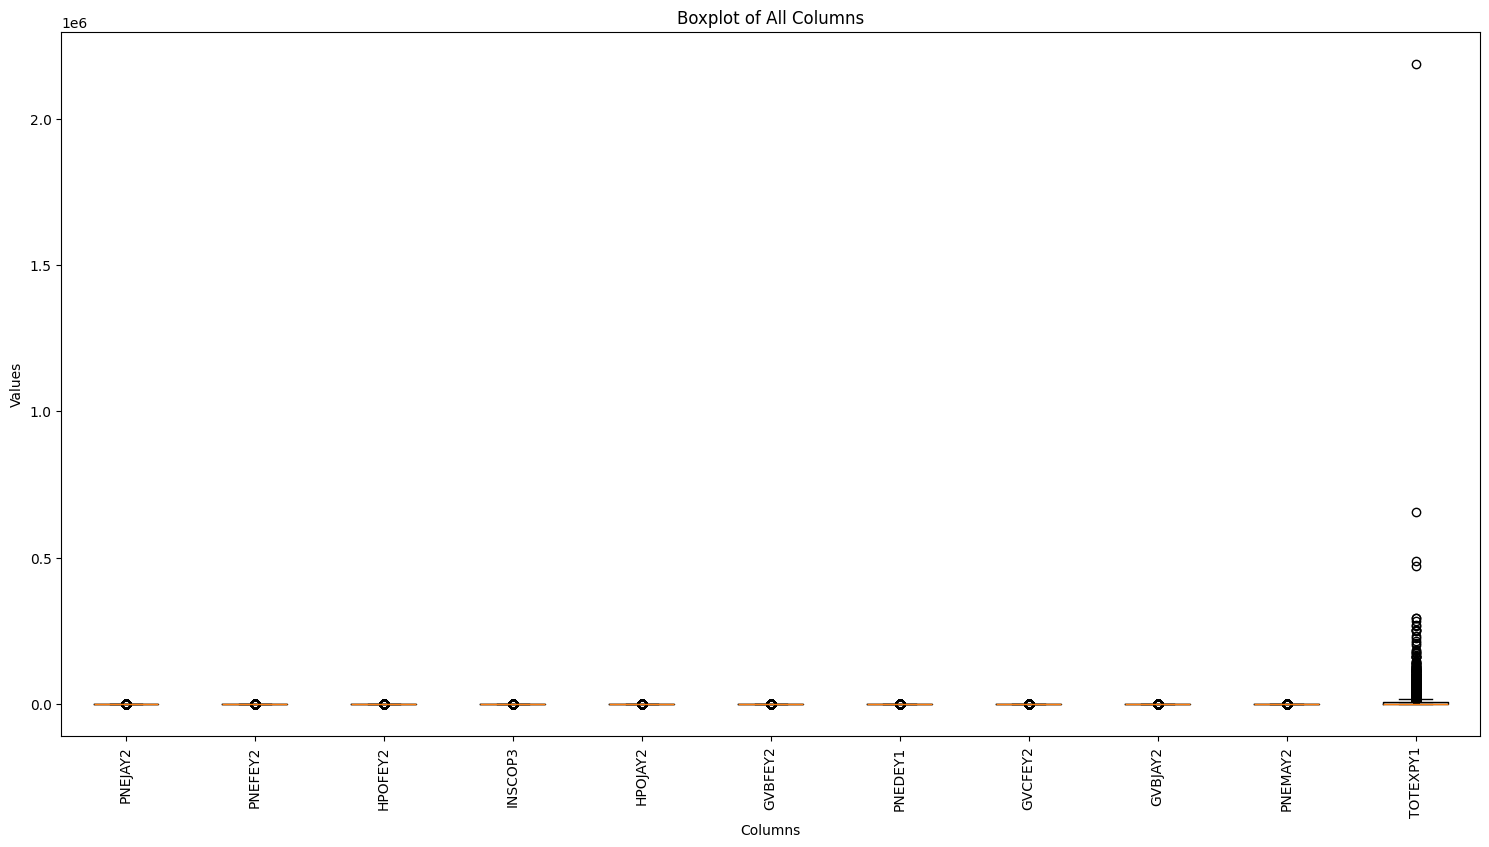

In [25]:
#import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure for plotting
plt.figure(figsize=(15, 8))

plt.boxplot([des1_meps_top_20a[col] for col in des1_meps_top_20a.columns], labels=des1_meps_top_20a.columns)

# Add title and labels
plt.title('Boxplot of All Columns')
plt.xlabel('Columns')
plt.ylabel('Values')

# Show the plot
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

In [26]:
# Check for duplicate rows
duplicates = des1_meps_top_20a[des1_meps_top_20a.duplicated()]
print("\nDuplicate rows:")
print(duplicates)


Duplicate rows:
      PNEJAY2  PNEFEY2  HPOFEY2  INSCOP3  HPOJAY2  GVBFEY2  PNEDEY1  GVCFEY2  \
14          2        2        2        1        2        2        2        2   
20          2        2        2        1        2        2        2        2   
21          2        2        2        1        2        2        2        2   
27          2        2        2        1        2        2        2        2   
47          2        2        2        1        2        2        2        2   
...       ...      ...      ...      ...      ...      ...      ...      ...   
6731        2        2        2        1        2        2        2        2   
6732        2        2        2        1        2        2        2        2   
6734        2        2        2        1        2        2        2        2   
6736        2        2        2        1        2        2        2        2   
6740        2        2        2        1        2        2        2        2   

      GVBJAY2  PNEMAY2

In [27]:
# Function to calculate outliers
def remove_outliers(des1_meps_top_20a):
    # Iterate through each column to remove outliers
    for col in des1_meps_top_20a.columns:
        # Only process numerical columns
        if des1_meps_top_20a[col].dtype != 'object':
            Q1 = des1_meps_top_20a[col].quantile(0.25)
            Q3 = des1_meps_top_20a[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            des1_meps_top_20a = des1_meps_top_20a[(des1_meps_top_20a[col] >= lower_bound) & (des1_meps_top_20a[col] <= upper_bound)]
    return des1_meps_top_20a

# Remove outliers
des1_meps_top_20a_cleaned = remove_outliers(des1_meps_top_20a)

# Display the cleaned DataFrame
print(des1_meps_top_20a_cleaned)

      PNEJAY2  PNEFEY2  HPOFEY2  INSCOP3  HPOJAY2  GVBFEY2  PNEDEY1  GVCFEY2  \
0           2        2        2        1        2        2        2        2   
1           2        2        2        1        2        2        2        2   
2           2        2        2        1        2        2        2        2   
3           2        2        2        1        2        2        2        2   
4           2        2        2        1        2        2        2        2   
...       ...      ...      ...      ...      ...      ...      ...      ...   
6734        2        2        2        1        2        2        2        2   
6735        2        2        2        1        2        2        2        2   
6736        2        2        2        1        2        2        2        2   
6737        2        2        2        1        2        2        2        2   
6740        2        2        2        1        2        2        2        2   

      GVBJAY2  PNEMAY2  TOTEXPY1  
0   

In [28]:
des1_meps_top_20a_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5666 entries, 0 to 6740
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   PNEJAY2   5666 non-null   int64
 1   PNEFEY2   5666 non-null   int64
 2   HPOFEY2   5666 non-null   int64
 3   INSCOP3   5666 non-null   int64
 4   HPOJAY2   5666 non-null   int64
 5   GVBFEY2   5666 non-null   int64
 6   PNEDEY1   5666 non-null   int64
 7   GVCFEY2   5666 non-null   int64
 8   GVBJAY2   5666 non-null   int64
 9   PNEMAY2   5666 non-null   int64
 10  TOTEXPY1  5666 non-null   int64
dtypes: int64(11)
memory usage: 531.2 KB


### Since this cleaned data set (des1_meps_top_20a_cleaned) is still having 5000+ records, then I am going to get a sample of 1200 records

In [39]:
# Randomly sample 1,000 records (18% of 5,666)
des1_meps_top_20a_cleaned_sample = des1_meps_top_20a_cleaned.sample(n=1000, random_state=42)  # Set seed for reproducibility

In [41]:
des1_meps_top_20a_cleaned_sample.describe()

,PNEJAY2,PNEFEY2,HPOFEY2,INSCOP3,HPOJAY2,GVBFEY2,PNEDEY1,GVCFEY2,GVBJAY2,PNEMAY2,TOTEXPY1
count,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.000000
mean,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2995.263000
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3710.517593
min,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,0.000000
25%,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,353.750000
50%,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1454.500000
75%,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,4219.750000
max,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,15800.000000


/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 59.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/tmp/ipykernel_1599/1547704941.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(des1_meps_top_20a_cleaned_sample[column], color="green", shade=True, ax=axes[4 * i + 2])
/tmp/ipykernel_1599/1547704941.py:27: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(des1_meps_top_20a_cleaned_sample[column], color="green", shade=True, ax=axes[4 * i + 2])
/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 95.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

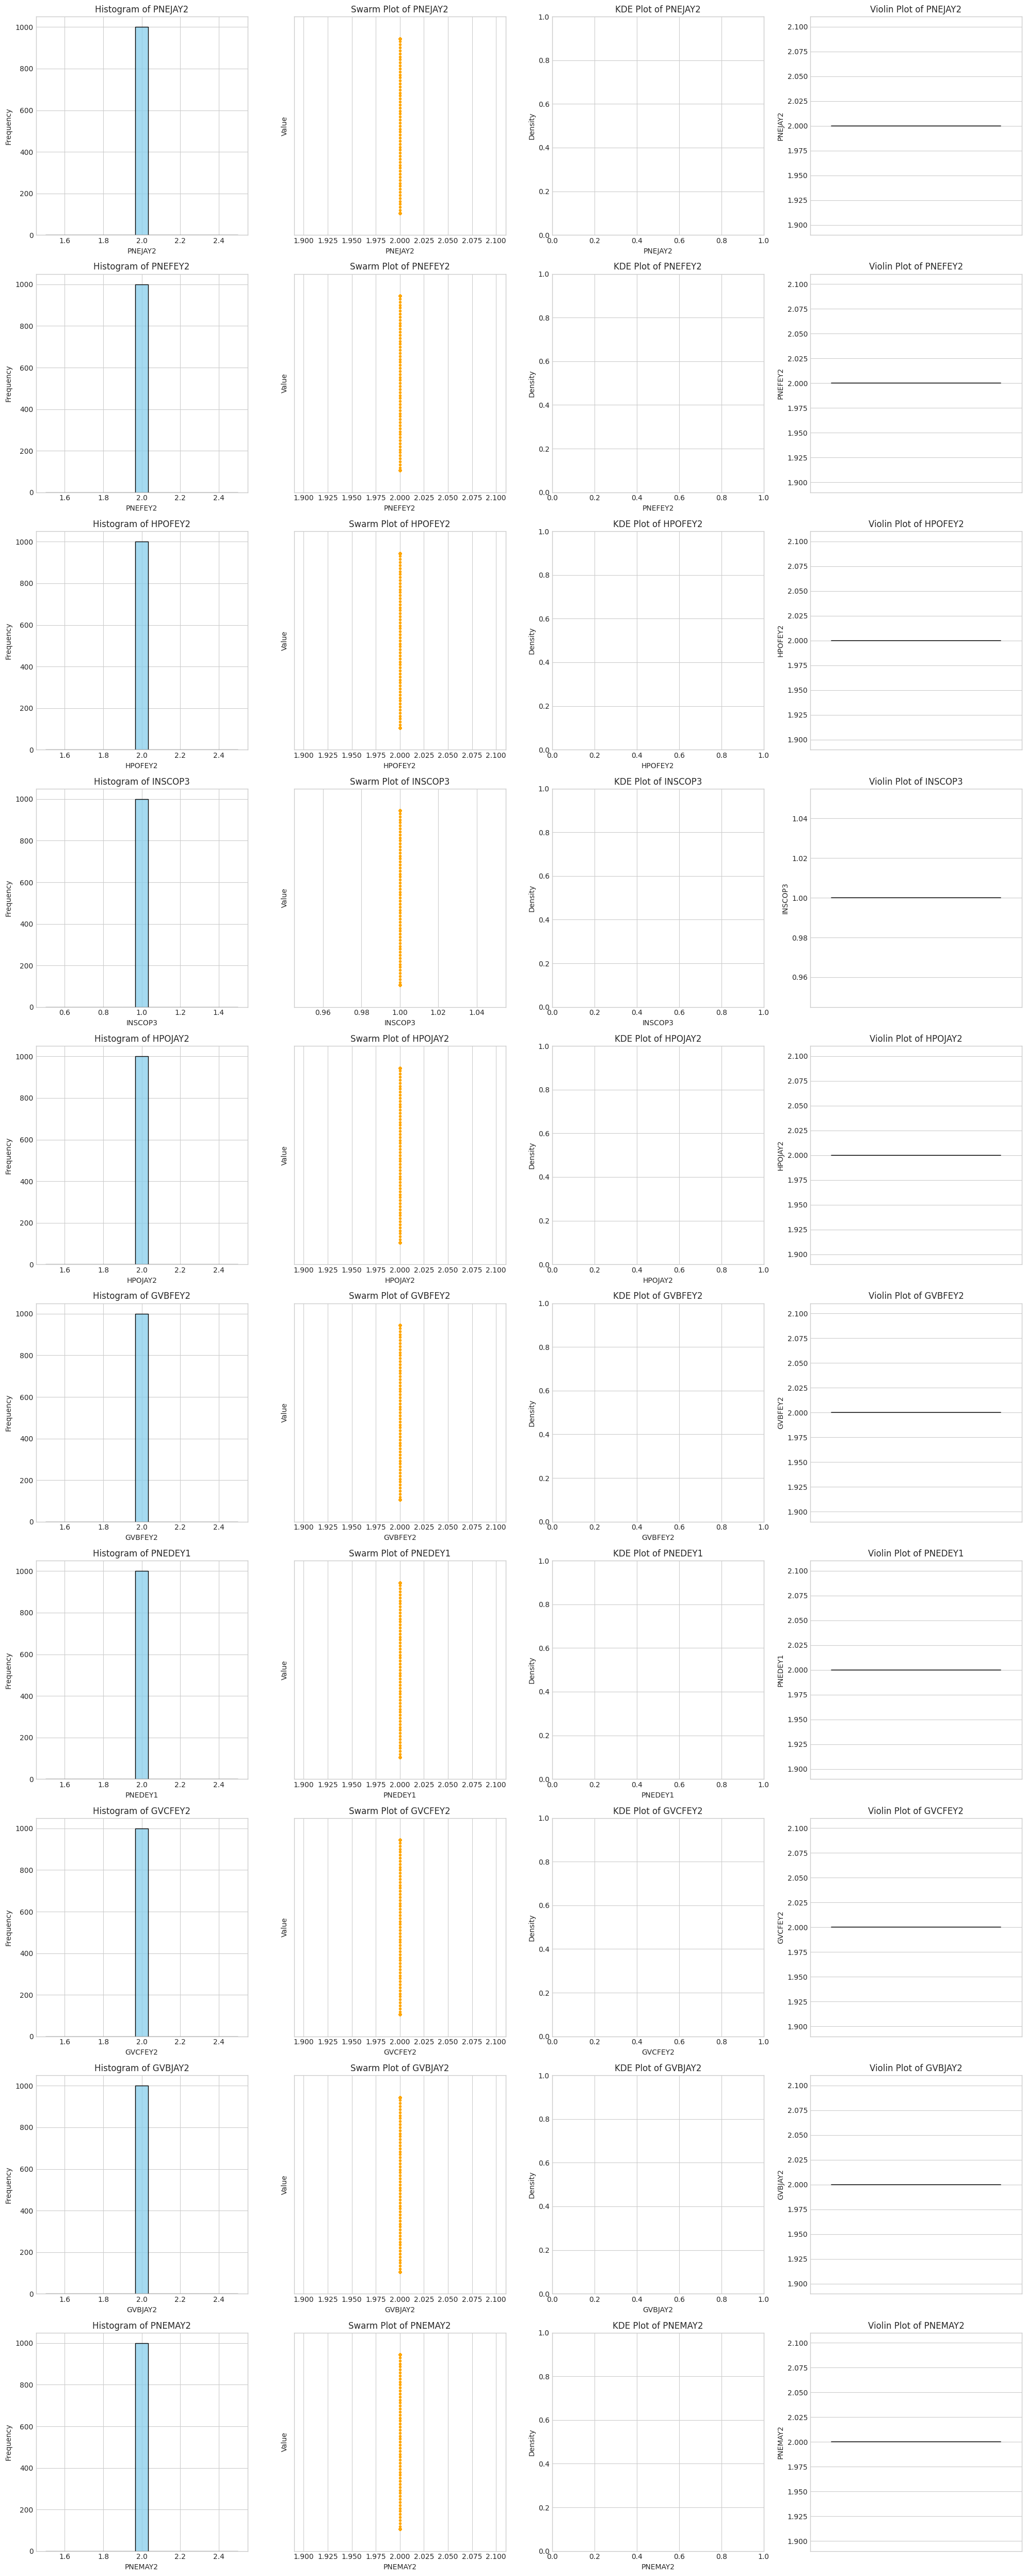

In [42]:
# The followong code would devlop the 4 graphs (Histogram, Swarm Plot, KDE Plot & Violin Plot) in row for each Feature/ Column in a grid.
# This grid view could help to analyze the data distribution of each Feature/ Column

# Set up the plotting environment
plt.style.use('seaborn-v0_8-whitegrid')

# Create a grid for all features (12 features × 4 plots per feature = 48 subplots)
num_features = len(des1_meps_top_20a_cleaned_sample.columns[:-1])  # Exclude 'target'
fig, axes = plt.subplots(num_features, 4, figsize=(20, 5 * num_features))  # 12 rows, 4 columns
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# Loop through each column (excluding the target column)
for i, column in enumerate(des1_meps_top_20a_cleaned_sample.columns[:-1]):  # Exclude 'target'
    # Histogram
    sns.histplot(des1_meps_top_20a_cleaned_sample[column], bins=15, color="skyblue", edgecolor="black", ax=axes[4 * i])
    axes[4 * i].set_title(f"Histogram of {column}", fontsize=12)
    axes[4 * i].set_xlabel(column, fontsize=10)
    axes[4 * i].set_ylabel("Frequency", fontsize=10)  
    
    # Swarm Plot
    sns.swarmplot(x=des1_meps_top_20a_cleaned_sample[column], color="orange", size=4, ax=axes[4 * i + 1])
    axes[4 * i + 1].set_title(f"Swarm Plot of {column}", fontsize=12)
    axes[4 * i + 1].set_xlabel(column, fontsize=10)
    axes[4 * i + 1].set_ylabel("Value", fontsize=10)
    
    # KDE Plot
    sns.kdeplot(des1_meps_top_20a_cleaned_sample[column], color="green", shade=True, ax=axes[4 * i + 2])
    axes[4 * i + 2].set_title(f"KDE Plot of {column}", fontsize=12)
    axes[4 * i + 2].set_xlabel(column, fontsize=10)
    axes[4 * i + 2].set_ylabel("Density", fontsize=10)
    
    # Violin Plot
    sns.violinplot(y=des1_meps_top_20a_cleaned_sample[column], color="purple", inner="quartile", ax=axes[4 * i + 3])
    axes[4 * i + 3].set_title(f"Violin Plot of {column}", fontsize=12)
    axes[4 * i + 3].set_ylabel(column, fontsize=10)

# Hide any unused subplots
for j in range(len(des1_meps_top_20a_cleaned_sample.columns[:-1]) * 4, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 99-119 of the Storytelling With Data book as best you can. (The first half of chapter four). You do not have to get the exact data values right, just the overall look and feel.

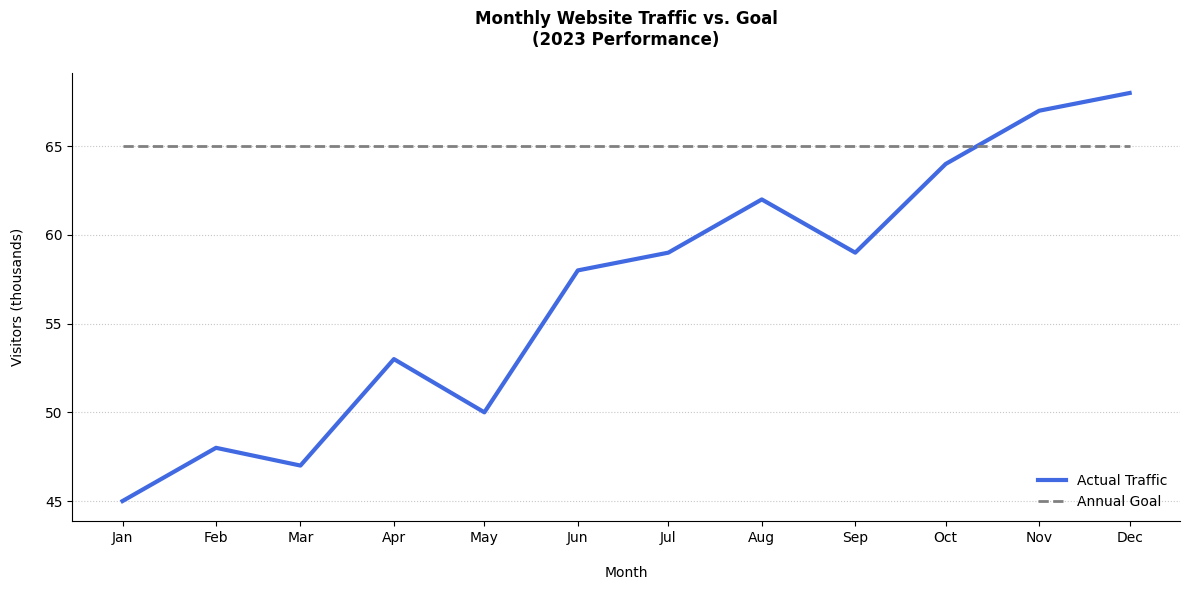

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Data
months = [datetime(2023, m, 1) for m in range(1, 13)]
traffic = [45, 48, 47, 53, 50, 58, 59, 62, 59, 64, 67, 68]
goal = [65] * 12  # Flat goal line

# Create figure
plt.figure(figsize=(12, 6))

# Plot lines
plt.plot(months, traffic, color='royalblue', linewidth=3, label='Actual Traffic')
plt.plot(months, goal, color='gray', linestyle='--', linewidth=2, label='Annual Goal')

# Formatting
plt.title('Monthly Website Traffic vs. Goal\n(2023 Performance)', pad=20, fontweight='bold')
plt.xlabel('Month', labelpad=15)
plt.ylabel('Visitors (thousands)', labelpad=15)
plt.grid(axis='y', linestyle=':', alpha=0.7)

# Date formatting
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Annotation for goal achievement
plt.annotate('Goal Exceeded!', 
             xy=(months[6], 74), 
             xytext=(months[4], 85),
             arrowprops=dict(arrowstyle='->', color='black'),
             fontsize=10)

# Remove spines
plt.gca().spines[['top', 'right']].set_visible(False)

# Legend
plt.legend(loc='lower right', frameon=False)

plt.tight_layout()
plt.show()